In [2]:
import numpy as np
import os
import cv2  
import matplotlib.pyplot as plt 
import random

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torchvision.transforms import Compose, Resize, Normalize, ToTensor
from torchvision import transforms

from itertools import islice
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from torch.nn.functional import sigmoid

from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle  

# Import Data

In [ ]:
/*
"""
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

IMAGE_SIZE = (150, 150)

train_img = []
test_img = []

train_labels = []
test_labels = []


os.chdir('/Users/pavelshaburov/Desktop/ComputerVision/Image_Classification/archive/')

for folder in os.listdir():
    local_path = os.path.join(folder)
    #if os.path.basename(local_path) == "seg_train":
    for sub_folder in os.listdir(local_path):
        class_folder = os.path.join(local_path, sub_folder)
        if os.path.isdir(class_folder):
            for item in os.listdir(class_folder):
                image_path = os.path.join(class_folder, item)
                label = class_names_label[os.path.basename(class_folder)]
                
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                if os.path.basename(local_path) == "seg_train":
                    train_img.append(image)
                    train_labels.append(label)
                else:
                    test_img.append(image)
                    test_labels.append(label)
                           

                        
train_img = np.array(train_img)
train_img = (train_img/255.0)
train_img = np.transpose(train_img, (0, 3, 1, 2))
train_labels = np.array(train_labels,  dtype = 'int32')

test_img = np.array(test_img)
test_img = (test_img/255.0)
test_img = np.transpose(test_img, (0, 3, 1, 2))
test_labels = np.array(test_labels,  dtype = 'int32')   
"""
*/

## Create Dataset

In [ ]:
ImageFolder?

In [3]:
os.chdir('/home/iris/paulshab/ImageClassification/')

t = Compose([
    #Resize((150, 150)),
    #Resize((227, 227)),
    Resize((224, 224)),
    ToTensor(),
    Normalize((0.5,), (0.5,)),
])

train_dataset = ImageFolder("archive/seg_train/", transform=t)
val_dataset = ImageFolder("archive/seg_test/", transform=t)

print(len(train_dataset))
print(len(val_dataset))

14034
3000


## Display Data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


glacier
AxesImage(54,36;334.8x217.44)


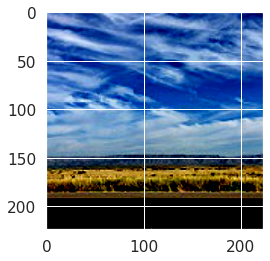

In [4]:
class_names = ['buildings','forest', 'glacier', 'mountain', 'sea', 'street' ]

def display_images():
    k = random.randint(0, 10000)
    img = np.array(train_dataset[k][0])
    img = np.transpose(img, (1, 2, 0))
    print(class_names[train_dataset[k][1]])
    print(plt.imshow(img))


display_images()

## Create Dataloader

In [5]:
trainloader = DataLoader(
    train_dataset,
    batch_size=16,
    shuffle=True,
    num_workers=8,
    drop_last=True
)

testloader = DataLoader(
    val_dataset,
    batch_size=16 ,
    shuffle=True,
    num_workers=8,
    drop_last=True
)

In [6]:
### check dataloader
batch = next(iter(trainloader))
images, labels = batch

print(images.shape)
print(labels.shape)

torch.Size([16, 3, 224, 224])
torch.Size([16])


In [ ]:
class ConvBlock(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.cnn_model = nn.Sequential(
           nn.Conv2d(chann, chann, kernel_size=3, padding=1), 
            nn.BatchNorm2d(chann),
            nn.ReLU(),
            nn.Conv2d(chann, chann, kernel_size=3, padding=1), 
            nn.BatchNorm2d(chann),
            nn.ReLU(),
            nn.Conv2d(chann, chann, kernel_size=3, padding=1),
            nn.BatchNorm2d(), 
        )
        
        

    def forward(self, X):
        # X.shape == (batch_size, 3, 227, 227)
        X = self.cnn_model(X) 
        up_part = nn.Conv2d(chann, chann, kernel_size=3, padding=1)(X)
        #up_part = nn.BatchNorm2d(num_features=3) 
        low_part = cnn_model(X)
        up_part = cnn_model(X)
        res = torch.cat((low_part, up_part), 1)
        res = nn.ReLU()(res)
        return X
            

In [7]:
def ConvBlock(X, chann):
    cnn_model = nn.Sequential(
        nn.Conv2d(chann, chann, kernel_size=3, padding=1), 
        #nn.BatchNorm2d(chann),
        nn.ReLU(),
        nn.Conv2d(chann, chann, kernel_size=3, padding=1), 
        #nn.BatchNorm2d(chann),
        nn.ReLU(),
        nn.Conv2d(chann, chann, kernel_size=3, padding=1),
        #nn.BatchNorm2d(),
    )
    
    up_part = nn.Conv2d(chann, chann, kernel_size=3, padding=1)(X)
    #up_part = nn.BatchNorm2d(num_features=3) 
    low_part = cnn_model(X)
    up_part = cnn_model(X)
    res = torch.cat((low_part, up_part), 1)
    res = nn.ReLU()(res)
    return res

In [8]:
def IdenityBlock(X, chann):
    cnn_model = nn.Sequential(
        nn.Conv2d(chann, chann, kernel_size=3, padding=1), 
        #nn.BatchNorm2d(chann),
        nn.ReLU(),
        nn.Conv2d(chann, chann, kernel_size=3, padding=1), 
        #nn.BatchNorm2d(chann),
        nn.ReLU(),
        nn.Conv2d(chann, chann, kernel_size=3, padding=1),
        #nn.BatchNorm2d(),
    )
    
    X = torch.cat((cnn_model(X), X), 1)
    X = nn.ReLU()(X)
    return X  

In [6]:
batch = next(iter(trainloader))
images, labels = batch
print("real size:", images.shape)
    
conv_block = ConvBlock(images, 3)
print("\nconvBlock size:", conv_block.shape)

id_block = IdenityBlock(images, 3)
print("\nidBlock size:", id_block.shape)

real size: torch.Size([16, 3, 224, 224])

convBlock size: torch.Size([16, 6, 224, 224])

idBlock size: torch.Size([16, 6, 224, 224])


In [15]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2), 
            nn.ReLU(),
            nn.MaxPool2d(3, stride = 2),
            nn.BatchNorm2d(64)  
        )
        
        #self.fc_model = nn.Sequential()
        

    def forward(self, X):
        # X.shape == (batch_size, 3, 227, 227)
        X = self.cnn_model(X)
        #X = X.view(X.size(0), -1) 
        #X = self.fc_model(X)  
        return X
            

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#net_batch = AlexNet().cuda()
net_batch = ResNet().to(device)

batch = next(iter(trainloader))
images, labels = batch

images = images.to(device)
labels = labels.to(device)

#print(images.shape, labels.shape)
    
logits = net_batch(images)
print(logits.shape)
    

torch.Size([16, 64, 54, 54])


## Building the Model:

In [ ]:
#%save -f "alexnet.py"
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4),           # ( in_channels, out_channels, window_size, )
            nn.ReLU(),
            nn.MaxPool2d(3, stride = 2),                          # kernel size, stride
            nn.Conv2d(96, 256, kernel_size = 5, padding=2, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(3, stride = 2), 
            nn.Conv2d(256, 384, kernel_size = 3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(384, 384, kernel_size = 3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(384, 256, kernel_size = 3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(3, stride = 2),
        )
        self.fc_model = nn.Sequential(
            nn.Linear(9216, 4096),
            nn.ReLU(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Linear(4096, 6)
        )
        

    def forward(self, X):
        # X.shape == (batch_size, 3, 227, 227)
        X = self.cnn_model(X)
        X = X.view(X.size(0), -1) 
        X = self.fc_model(X)  
        return X
            

### Check Forward Pass

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#net_batch = AlexNet().cuda()
net_batch = AlexNet().to(device)

batch = next(iter(trainloader))
images, labels = batch

images = images.to(device)
labels = labels.to(device)

#print(images.shape, labels.shape)
    
logits = net_batch(images)
print(logits.shape)
    

## Train Model
### Sanity Check

In [ ]:
learning_rate = 1e-5
criterion = nn.CrossEntropyLoss()      # has softmax inside

In [ ]:
#from tqdm import trange
#from time import sleep

net_batch.train()
batch_optimizer = optim.Adam(net_batch.parameters(), lr=learning_rate)

scheduler = optim.lr_scheduler.MultiStepLR(
    batch_optimizer,
    milestones=[80,160,240],
    gamma=0.1
)

batch = next(iter(trainloader))
images, labels = batch
#images, labels = images[:1].cuda(), labels[:1].cuda()
images, labels = images[:1].to(device), labels[:1].to(device)
print("Shapes", images.shape, labels.shape)
print("item", images.dtype, labels.dtype)

loss_vals = []
num_epochs = 400
for epoch in tqdm(range(num_epochs)):
    y_pred = net_batch(images.float().requires_grad_(True))
    #print(y_pred.shape)
    
    loss = criterion(y_pred, labels)

    batch_optimizer.zero_grad()
    loss.backward()
    batch_optimizer.step()

    loss_vals.append(loss.item())
    #scheduler.step()


In [ ]:
print("min loss value", loss_vals[-1])

plt.plot(range(1, len(loss_vals) +1), loss_vals, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

### Full Model

In [ ]:
net = AlexNet().to(device)
net.train()

optimizer = optim.Adam(net.parameters(), lr=learning_rate)

loss_arr = []
num_epochs = 100
for epoch in tqdm(range(num_epochs)):
    loss_val = 0
    for batch in trainloader:
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)
        
        #forward
        y_pred = net(images)
        loss = criterion(y_pred,labels)
        loss_val = loss + loss_val
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        
        #gradient decent
        optimizer.step()
        
    loss_val = loss_val/16
    #print(loss_val)
    loss_arr.append(loss_val)

In [ ]:
print("min loss value", loss_arr[-1])

plt.plot(range(1, len(loss_arr) +1), loss_arr, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

## Accuracy Check

In [ ]:
m = nn.Softmax(dim=1)

def check_accuracy(model, X_set):
    model.eval()
    
    mistake_img = []
    mistake_label = []
    true_label = []
    pred = []
    lbl = []
    correct = 0
    total = 0
    for batch in X_set:
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)
    
        with torch.no_grad():
            y_pred = model(images)
        
        y_pred = m(y_pred)
        _, y_pred = y_pred.max(1)
        
        correct += (y_pred == labels).sum()
        total += y_pred.size(0)
        
        mistake = (y_pred == labels)
 
        for i in range(mistake.shape[0]):
            if mistake[i] == False:
                mistake_img.append(images[i].cpu().numpy())
                mistake_label.append(y_pred[i].cpu().numpy())
                true_label.append(labels[i].cpu().numpy())
        
        pred.append(y_pred.cpu().numpy())
        lbl.append(labels.cpu().numpy())
        

    print('Accuracy of the network on the images: %d %%' % (100 * correct / total))
    return mistake_img, mistake_label, true_label, pred, lbl  

mist_train_img, mist_train_lbl, train_true_lbl, train_pred, train_lbl  = check_accuracy(net, trainloader)    # train acc
test_img, test_lbl, test_true,  test_pred, test_lbl = check_accuracy(net, testloader)    # test acc
# mistake_images, mistake_labels, ground_truth_labels, img_pred, lbl_pred

In [ ]:
print(len(mist_train_img))
print(len(mist_train_lbl))
print(len(train_true_lbl))

print(len(train_pred))
print(len(train_lbl))

In [ ]:
def display_false_images(img_set, label_set, true_set):
    k = random.randint(0, len(img_set))
    #k = 0
    img = img_set[k]
    img = np.transpose(img, (1, 2, 0))
    print("predicted class", class_names[label_set[k]])
    print("true class:", class_names[true_set[k]])
    plt.rcParams["axes.grid"] = False
    print(plt.imshow(img))


#display_false_images(test_img, test_lbl, test_true)
display_false_images(mist_train_img, mist_train_lbl, train_true_lbl)

In [ ]:
len(test_lbl)
len(test_img)


## Confusion Matrix

In [ ]:
for i in range(len(test_lbl)):
    test_pred[i] = test_pred[i].tolist()
    test_lbl[i] = test_lbl[i].tolist()

In [ ]:
CM = np.zeros((6, 6))
for i in range(len(test_pred)):
    CM += confusion_matrix(test_lbl[i], test_pred[i], labels=[0, 1, 2, 3, 4, 5])
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()


In [ ]:
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),           # ( in_channels, out_channels, window_size, )
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),           # ( in_channels, out_channels, window_size, )
            nn.ReLU(),
            nn.MaxPool2d(2, stride = 2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),           # ( in_channels, out_channels, window_size, )
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),           # ( in_channels, out_channels, window_size, )
            nn.ReLU(),
            nn.MaxPool2d(2, stride = 2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),           # ( in_channels, out_channels, window_size, )
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),           # ( in_channels, out_channels, window_size, )
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),           # ( in_channels, out_channels, window_size, )
            nn.ReLU(),
            nn.MaxPool2d(2, stride = 2),
            
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),           # ( in_channels, out_channels, window_size, )
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),           # ( in_channels, out_channels, window_size, )
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),           # ( in_channels, out_channels, window_size, )
            nn.ReLU(),
            nn.MaxPool2d(2, stride = 2),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),           # ( in_channels, out_channels, window_size, )
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),           # ( in_channels, out_channels, window_size, )
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),           # ( in_channels, out_channels, window_size, )
            nn.ReLU(),
            nn.MaxPool2d(2, stride = 2),
            
        )
        self.fc_model = nn.Sequential(
            nn.Linear(25088, 4096),
            nn.ReLU(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Linear(4096, 6)
        )
        

    def forward(self, X):
        # X.shape == (batch_size, 512, 7, 7)
        X = self.cnn_model(X)
        X = X.view(X.size(0), -1) 
        X = self.fc_model(X)  
        return X
            

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


net_batch = VGG16()

batch = next(iter(trainloader))
images, labels = batch

#print(images.shape, labels.shape)
    
logits = net_batch(images)
print(logits.shape)
    

In [5]:
%load_ext autoreload
%autoreload 2

from AlexNet import AlexNet
from VGG16 import VGG16
from PrepareData import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from AlexNet import random_func
random_func()

hello


In [7]:
train, test = create_dataset()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


glacier
AxesImage(54,36;334.8x217.44)


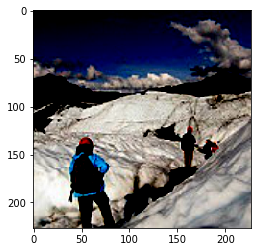

In [25]:
display_images(test)

In [ ]:
create_dataloader(train_dataset, val_dataset)

In [26]:
print("hello")

hello
